In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [2]:
data = pd.read_csv(filepath_or_buffer='C://Projects//Zoho crm//Datasets//Preprocessed Data//new_data_.csv', sep=',', header=0)

In [5]:
data.head()

B2B SaaS    99
Name: Software_Type, dtype: int64

In [4]:
data.isnull().sum()

Company_Name           0
Founder_Name           0
Founder_linkedin_id    0
No_of_Employees        0
Funding_Type           0
Year_Founded           0
Software_Type          0
Industry_Type          0
Category               0
Size_of_Company        0
Company_Website        0
Company_Linkedin_id    0
City                   0
Address                0
Short_Desription       0
dtype: int64

In [5]:
data['Founder_Name'].fillna('Unknown',inplace=True)
data['Address'].fillna('No Address Available',inplace=True)
data['Company_Website'].fillna('No Website Available',inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Company_Name         99 non-null     object
 1   Founder_Name         99 non-null     object
 2   Founder_linkedin_id  99 non-null     object
 3   No_of_Employees      99 non-null     object
 4   Funding_Type         99 non-null     object
 5   Year_Founded         99 non-null     int64 
 6   Software_Type        99 non-null     object
 7   Industry_Type        99 non-null     object
 8   Category             99 non-null     object
 9   Size_of_Company      99 non-null     object
 10  Company_Website      99 non-null     object
 11  Company_Linkedin_id  99 non-null     object
 12  City                 99 non-null     object
 13  Address              99 non-null     object
 14  Short_Desription     99 non-null     object
dtypes: int64(1), object(14)
memory usage: 11.7+ KB


In [7]:
data.Short_Desription

0     Anatomically-precise 3D and 4D surface imaging...
1     Browser-based video, voice chat and screen sha...
2               AI-based business intelligence platform
3     Supply chain planning software and POS data an...
4          Privileged Access Application for Salesforce
                            ...                        
94           Inventory and material management software
95                                   Interview software
96                                          Ag software
97                               Cybersecurity platform
98    Front-end automated testing for running unit a...
Name: Short_Desription, Length: 99, dtype: object

In [8]:
data["Funding_Type"].value_counts()

Self-funded               54
VC-funded                 14
Acquired                  12
Angel or Seed Funding      9
Public                     5
Other                      3
Private Equity funding     2
Name: Funding_Type, dtype: int64

In [9]:
data["Industry_Type"].value_counts()

Horizontal                                 61
Healthcare                                 15
Legal                                       3
Construction                                3
Retail                                      3
Energy, Gas, Oil, Utilities                 2
Education                                   2
Automotive                                  2
Entertainment, Hospitality, Travel          1
Real Estate & Property Mgt.                 1
Financial Services                          1
Sports and Fitness                          1
Food                                        1
Logistics, Supply Chain, Transportation     1
CPG                                         1
Agriculture                                 1
Name: Industry_Type, dtype: int64

In [10]:
list(data["Industry_Type"].unique())

['Horizontal',
 'Healthcare',
 'Legal',
 'Energy, Gas, Oil, Utilities',
 'Construction',
 'Entertainment, Hospitality, Travel',
 'Retail',
 'Real Estate & Property Mgt.',
 'Financial Services',
 'Education',
 'Automotive',
 'Sports and Fitness',
 'Food',
 'Logistics, Supply Chain, Transportation',
 'CPG',
 'Agriculture']

In [11]:
data["No_of_Employees"].value_counts()

11-50 employees         40
51-200 employees        19
1-10 employees          16
1001-5000 employees     12
10,001+ employees        5
501-1000 employees       3
201-500 employees        3
5001-10000 employees     1
Name: No_of_Employees, dtype: int64

In [12]:
data["Size_of_Company"].value_counts()

Small      40
Medium     22
Large      21
Startup    16
Name: Size_of_Company, dtype: int64

In [13]:
data.columns

Index(['Company_Name', 'Founder_Name', 'Founder_linkedin_id',
       'No_of_Employees', 'Funding_Type', 'Year_Founded', 'Software_Type',
       'Industry_Type', 'Category', 'Size_of_Company', 'Company_Website',
       'Company_Linkedin_id', 'City', 'Address', 'Short_Desription'],
      dtype='object')

In [14]:
columns = ['Founder_Name','Founder_linkedin_id','Year_Founded', 'Company_Website',
       'Company_Linkedin_id', 'City','Address', 'Short_Desription']
data = data.drop(columns=columns)

In [15]:
data.head()

,Company_Name,No_of_Employees,Funding_Type,Software_Type,Industry_Type,Category,Size_of_Company
0,3dMD,11-50 employees,Self-funded,B2B SaaS,Horizontal,On-Demand Services,Small
1,86Borders,11-50 employees,VC-funded,B2B SaaS,Horizontal,Communications,Small
2,Absolute E,11-50 employees,Self-funded,B2B SaaS,Horizontal,Analytics and BI,Small
3,Absolute Value,11-50 employees,Self-funded,B2B SaaS,Horizontal,Business Mgt and ERP,Small
4,accessnow,1-10 employees,Self-funded,B2B SaaS,Horizontal,Compliance,Startup


In [16]:
data = data[1:]

In [17]:
cat_list = list(data['Industry_Type'].unique())
cat_list 

['Horizontal',
 'Healthcare',
 'Legal',
 'Energy, Gas, Oil, Utilities',
 'Construction',
 'Entertainment, Hospitality, Travel',
 'Retail',
 'Real Estate & Property Mgt.',
 'Financial Services',
 'Education',
 'Automotive',
 'Sports and Fitness',
 'Food',
 'Logistics, Supply Chain, Transportation',
 'CPG',
 'Agriculture']

In [18]:
label_encoders = {}
categorical_columns = ['Industry_Type', 'Category', 'Software_Type', 'No_of_Employees','Size_of_Company', 'Funding_Type']
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [19]:
data.dropna(inplace=True)

In [20]:
X = data[categorical_columns]

In [21]:
data

,Company_Name,No_of_Employees,Funding_Type,Software_Type,Industry_Type,Category,Size_of_Company
1,86Borders,3,6,0,10,5,2
2,Absolute E,3,5,0,10,1,2
3,Absolute Value,3,5,0,10,3,2
4,accessnow,0,5,0,10,6,3
5,Accord Systems,3,5,0,9,6,2
...,...,...,...,...,...,...,...
94,CribMaster,7,5,0,14,2,1
95,Critical Fit,0,5,0,10,10,3
96,Cultura Technologies,1,5,0,0,3,0
97,Cyber 2.0,3,5,0,10,7,2


In [22]:
X

,Industry_Type,Category,Software_Type,No_of_Employees,Size_of_Company,Funding_Type
1,10,5,0,3,2,6
2,10,1,0,3,2,5
3,10,3,0,3,2,5
4,10,6,0,0,3,5
5,9,6,0,3,2,5
...,...,...,...,...,...,...
94,14,2,0,7,1,5
95,10,10,0,0,3,5
96,0,3,0,1,0,5
97,10,7,0,3,2,5


In [23]:
class_counts = data["Industry_Type"].value_counts()
unique_classes = class_counts.index.tolist()

# Number of unique classes
num_classes = len(unique_classes)
print(unique_classes)
print(num_classes)

[10, 9, 11, 3, 14, 5, 4, 1, 6, 13, 7, 15, 8, 12, 2, 0]
16


In [24]:
potential_categories = ['Analytics and BI',
 'Business Mgt and ERP', 'AI and Machine Learning',
 'Virtual Reality', 'IT Mgt''Cybersecurity',
 'Cloud and Software Dev Tools',]
potential_category_codes = label_encoders['Category'].fit_transform(potential_categories)

In [6]:
'''potential_categories = ['On-Demand Services',
 'Communications',
 'Business Mgt and ERP',
 'Compliance',
 'Practice Management',
 'Sales and Marketing',     
 'Logistics and Supply Chain',
 'Accounting and Finance',
 'Ecommerce',
 'Document Management',
 'HR and Recruiting',
 'Point of Sale',
 'Marketplace',
 'Automation',
 'Clinical',
 'Student Mgt',
 'Practice Mgt',
 'eCommerce']
potential_category_codes = label_encoders['Category'].fit_transform(potential_categories)'''
data["Software_Type"].value_counts()

B2B SaaS    99
Name: Software_Type, dtype: int64

In [26]:
y = data.apply(
    lambda row: 1 if (
        row['Industry_Type'] == label_encoders['Industry_Type'].fit_transform(['Financial Services'])[0] or  label_encoders['Industry_Type'].fit_transform(['Government'])[0] and 
        row['Software_Type'] == label_encoders['Software_Type'].fit_transform(['B2B SaaS'])[0] or
        row['Size_of_Company'] == label_encoders['Size_of_Company'].fit_transform(['Medium'])[0]  and
        row['Category'] not in potential_category_codes or
        row['No_of_Employees'] == label_encoders['No_of_Employees'].fit_transform(['11-50 employees'])[0] or label_encoders['No_of_Employees'].fit_transform(['51-200 employees']) or
        row['Funding_Type'] == label_encoders['Funding_Type'].fit_transform(['Self-funded'])[0] 
    ) else 0,
    axis=1
)


print(y)

1     0
2     0
3     0
4     1
5     0
     ..
94    0
95    1
96    1
97    0
98    0
Length: 98, dtype: int64


In [27]:
y.value_counts()

0    66
1    32
dtype: int64

In [28]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:

classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
y_pred = classifier.predict(X_test)

In [31]:
y_pred[:5]

array([1, 1, 1, 0, 1], dtype=int64)

In [32]:

potential_customers = data.loc[X_test[y_pred == 1].index, 'Company_Name']
print("Potential customers to approach:")
print(potential_customers)

Potential customers to approach:
63     CDC Software
41      BBL Systems
95     Critical Fit
82    Compliance PT
84         Conduent
65         Ceridian
43      BeyondTrust
48        Blissbook
45      BigContacts
13          Aderant
Name: Company_Name, dtype: object


In [33]:
report = classification_report(y_test, y_pred)
report

'              precision    recall  f1-score   support\n\n           0       1.00      0.91      0.95        11\n           1       0.90      1.00      0.95         9\n\n    accuracy                           0.95        20\n   macro avg       0.95      0.95      0.95        20\nweighted avg       0.96      0.95      0.95        20\n'

In [34]:
confusion = confusion_matrix(y_test, y_pred)
confusion

array([[10,  1],
       [ 0,  9]], dtype=int64)

In [35]:

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.95


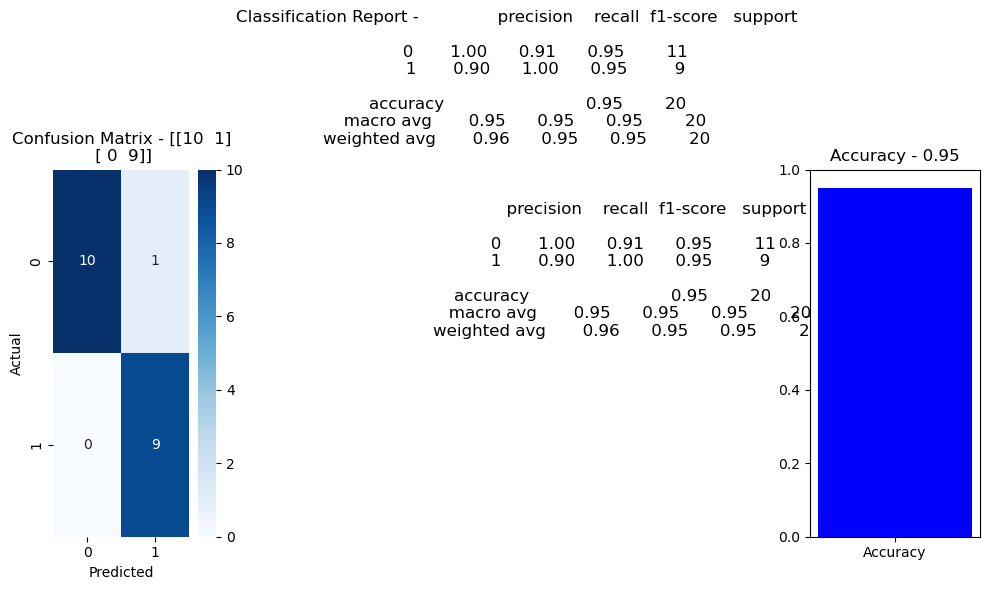

In [36]:
plt.figure(figsize=(10, 6))
    
plt.subplot(1, 3, 1)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {confusion}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
    
plt.subplot(1, 3, 2)
plt.text(0.01, 0.5, report, {'fontsize': 12})
plt.title(f'Classification Report - {report}')
    
plt.axis('off')
    
    
plt.subplot(1, 3, 3)
plt.bar(['Accuracy'], accuracy, color='blue')
plt.title(f'Accuracy - {accuracy}')
plt.ylim(0, 1)
    
plt.tight_layout()
plt.show()


In [37]:
values = {1:"YES", 0:"NO"}
y_pred_labels = [values[label] for label in y_pred]

In [38]:
y_pred_labels[:5]

['YES', 'YES', 'YES', 'NO', 'YES']

In [39]:
# Save the model to a file using pickle
import pickle
with open('model_crm.pkl', 'wb') as file:
    pickle.dump(classifier, file)
